In [1]:
#Importing pandas and datetime 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#We name the dataset 'solar' and save it as a pandas dataframe
solar = pd.read_csv(r'C:\Users\jabakoyas\Downloads\Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv')

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#A quick look at 5 rows from the dataset using 'head' command
solar.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
0,11/30/2019,4362-46733,Scotia,Schenectady,NY,12302,Residential,Residential/Small Commercial,PON 2112,National Grid,...,20.0,22950.00,5100.0,5.10,5987.0,No,No,No,NaN,"Scotia, NY 12302\n(42.866806, -73.967054)"
1,11/30/2019,4629-81627,Ridge,Suffolk,NY,11961,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,24.0,38552.20,1570.0,7.85,9212.0,No,No,No,NaN,"Ridge, NY 11961\n(40.893078, -72.883233)"
2,11/30/2019,4153-20910,Hermon,St. Lawrence,NY,13652,Residential,Residential/Small Commercial,PON 2112,National Grid,...,18.0,23315.49,7245.0,4.14,4860.0,NaN,No,No,NaN,"Hermon, NY 13652\n(44.438635, -75.211065)"
3,11/30/2019,4243-99046,Glen Oaks,Queens,NY,11004,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,36.0,50620.00,5886.0,11.77,13818.0,No,No,No,NaN,"Glen Oaks, NY 11004\n(40.745241, -73.712092)"
4,11/30/2019,4119-19663,Malone,Franklin,NY,12953,Residential,Residential/Small Commercial,PON 1050,National Grid,...,24.0,29468.00,8400.0,5.28,6198.0,NaN,No,No,NaN,"Malone, NY 12953\n(44.785967, -74.270547)"


In [4]:
#lets look at the number of rows and columns and their names
print("The dataset has the following columns: " ,solar.columns)
print('=============================\
      ==============================')
print(solar.info())


The dataset has the following columns:  Index(['Reporting Period', 'Project Number', 'City', 'County', 'State',
       'Zip Code', 'Sector', 'Program Type', 'Solicitation',
       'Electric Utility', 'Purchase Type', 'Date Application Received',
       'Date Completed', 'Project Status', 'Contractor',
       'Primary Inverter Manufacturer', 'Primary Inverter Model Number',
       'Total Inverter Quantity', 'Primary PV Module Manufacturer',
       'PV Module Model Number', 'Total PV Module Quantity', 'Project Cost',
       '$Incentive', 'Total Nameplate kW DC', 'Expected KWh Annual Production',
       'Remote Net Metering', 'Affordable Solar',
       'Community Distributed Generation',
       'Green Jobs Green New York Participant', 'Location 1'],
      dtype='object')
=============================      ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102905 entries, 0 to 102904
Data columns (total 30 columns):
Reporting Period                         102

#From the above, we have 102,904 rows and 30 columns.
#Some rows contain missing data.

In [5]:
len(solar['Zip Code'].unique())

1751

#The data comes from 1,751 different zipcodes in New York State

In [7]:
#Here we count the missing values for each column to identify columns with most missing values
solar.isnull().sum()

Reporting Period                             0
Project Number                               0
City                                         0
County                                       0
State                                        0
Zip Code                                     0
Sector                                       0
Program Type                                 0
Solicitation                                 0
Electric Utility                             0
Purchase Type                             5108
Date Application Received                    0
Date Completed                            4087
Project Status                               0
Contractor                                7693
Primary Inverter Manufacturer             3984
Primary Inverter Model Number            12835
Total Inverter Quantity                   4069
Primary PV Module Manufacturer            3932
PV Module Model Number                   12843
Total PV Module Quantity                  4044
Project Cost 

#From the above, we see some details on inverter and module model number is not available for all projects. 
#Remote net metering also misses a lot of values.
#There are missing values for other columns also as shown above.

In [8]:
#We will filter only new york city data. Since the data is listed by county, we will use the known counties to filter:
NYC_COUNTIES= ['Queens', 'Bronx', 'Kings', 'New York', 'Richmond']
solar_nyc = solar.loc[solar['County'].isin(NYC_COUNTIES)]
solar_nyc.to_csv(r'C:\Users\jabakoyas\Downloads\nyc_list.csv')


In [9]:
solar_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23815 entries, 3 to 102902
Data columns (total 30 columns):
Reporting Period                         23815 non-null object
Project Number                           23815 non-null object
City                                     23815 non-null object
County                                   23815 non-null object
State                                    23815 non-null object
Zip Code                                 23815 non-null int64
Sector                                   23815 non-null object
Program Type                             23815 non-null object
Solicitation                             23815 non-null object
Electric Utility                         23815 non-null object
Purchase Type                            23188 non-null object
Date Application Received                23815 non-null object
Date Completed                           21829 non-null object
Project Status                           23815 non-null object
Contracto

In [10]:
solar_nyc.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
3,11/30/2019,4243-99046,Glen Oaks,Queens,NY,11004,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,36.0,50620.0,5886.0,11.77,13818.0,No,No,No,NaN,"Glen Oaks, NY 11004\n(40.745241, -73.712092)"
11,11/30/2019,83105,Brooklyn,Kings,NY,11208,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,17959.0,1612.0,4.03,4731.0,NaN,No,No,NaN,"Brooklyn, NY 11208\n(40.673742, -73.872692)"
12,11/30/2019,98173,Queens,Queens,NY,11373,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,29670.0,2042.0,6.90,8099.0,NaN,No,No,NaN,"Queens, NY 11373\n(40.738576, -73.878172)"
13,11/30/2019,101095,Bronx,Bronx,NY,10465,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,18716.0,1716.0,4.29,5036.0,NaN,No,No,NaN,"Bronx, NY 10465\n(40.825915, -73.820974)"
16,11/30/2019,121954,Bronx,Bronx,NY,10457,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,19209.6,1357.0,5.80,6808.0,NaN,No,No,NaN,"Bronx, NY 10457\n(40.846788, -73.899203)"


In [12]:
solar_nyc['Community Distributed Generation'].value_counts()

No     23720
Yes       95
Name: Community Distributed Generation, dtype: int64

#The above indicates that there are 95 Community Distributed Generation projects in NYC.

In [11]:
solar_nyc['Project Status'].value_counts()

Complete    21829
Pipeline     1986
Name: Project Status, dtype: int64

#The above indicates that there are 1,986 projects still in the pipeline, whereas 21,829 projects are already completed.

In [12]:
solar_nyc['Date Completed'] = pd.to_datetime(solar_nyc['Date Completed'])


C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
#Below is the number of projects completed in the given years in nyc
by_year = solar_nyc['Date Completed'].dt.year.value_counts()
by_year

2017.0    4990
2018.0    4794
2019.0    4709
2016.0    3262
2015.0    1695
2014.0    1373
2012.0     336
2013.0     277
2011.0     159
2010.0      85
2009.0      64
2007.0      22
2008.0      19
2006.0      17
2004.0      11
2005.0       9
2003.0       5
2002.0       2
Name: Date Completed, dtype: int64

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


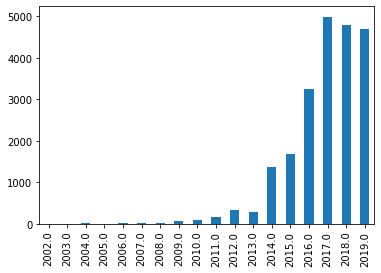

In [14]:
#Below we plot a bar graph of the project completions by year for New York City
by_year.sort_index().plot('bar')

In [94]:
#

In [15]:
solar_nyc['Completed'] = solar_nyc['Date Completed'].dt.year
solar_nyc

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1,Completed
3,11/30/2019,4243-99046,Glen Oaks,Queens,NY,11004,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,50620.0,5886.0,11.77,13818.0,No,No,No,NaN,"Glen Oaks, NY 11004\n(40.745241, -73.712092)",2017.0
11,11/30/2019,83105,Brooklyn,Kings,NY,11208,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,17959.0,1612.0,4.03,4731.0,NaN,No,No,NaN,"Brooklyn, NY 11208\n(40.673742, -73.872692)",2017.0
12,11/30/2019,98173,Queens,Queens,NY,11373,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,29670.0,2042.0,6.90,8099.0,NaN,No,No,NaN,"Queens, NY 11373\n(40.738576, -73.878172)",2017.0
13,11/30/2019,101095,Bronx,Bronx,NY,10465,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18716.0,1716.0,4.29,5036.0,NaN,No,No,NaN,"Bronx, NY 10465\n(40.825915, -73.820974)",2017.0
16,11/30/2019,121954,Bronx,Bronx,NY,10457,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,19209.6,1357.0,5.80,6808.0,NaN,No,No,NaN,"Bronx, NY 10457\n(40.846788, -73.899203)",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102896,11/30/2019,207989,Staten Island,Richmond,NY,10304,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,21673.0,1536.0,5.12,6010.0,NaN,No,No,NaN,"Staten Island, NY 10304\n(40.606587, -74.092177)",2019.0
102898,11/30/2019,187162,Staten Island,Richmond,NY,10309,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,72467.2,4116.0,21.44,25167.0,NaN,No,No,NaN,"Staten Island, NY 10309\n(40.532063, -74.215396)",2019.0
102899,11/30/2019,189102,Brooklyn,Kings,NY,11212,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,70000.0,2160.0,7.20,8452.0,NaN,No,No,NaN,"Brooklyn, NY 11212\n(40.661868, -73.913254)",2019.0
102900,11/30/2019,206025,Staten Island,Richmond,NY,10303,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13554.2,1006.0,3.36,3938.0,NaN,No,No,NaN,"Staten Island, NY 10303\n(40.629735, -74.162953)",2019.0


In [37]:
Bronx_zipcodes = [10453, 10457, 10460, 10458, 10467, 10468
,10451, 10452, 10456,10454, 10455, 10459, 10474, 10463, 10471
,10466, 10469, 10470, 10475, 10461, 10462,10464, 10465, 10472, 10473, 10803, ]

In [38]:
Brooklyn_zipcodes = [11212, 11213, 11216, 11233, 11238
, 11209, 11214, 11228, 11204, 11218, 11219, 11230,11234, 11236, 11239
,11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231
, 11203, 11210, 11225, 11226, 11207, 11208,11211, 11222
, 11220, 11232, 11206, 11221, 11237, 11249]

In [39]:
Manhattan_zipcodes = [10026, 10027, 10030, 10037, 10039
,10001, 10011, 10018, 10019, 10020, 10036
,10029, 10035,10010, 10016, 10017, 10022
,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280
,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128
,10023, 10024, 10025,10031, 10032, 10033, 10034, 10040, 10282,10278]

In [40]:
Queens_zipcodes = [11001, 11351,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364
,11354, 11355, 11356, 11357, 11358, 11359, 11360
, 11365, 11366, 11367, 11405, 11412, 11423, 11432, 11433, 11434, 11435, 11436
, 11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385
,11691, 11692, 11693, 11694, 11695, 11697,11004
,11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
, 11368, 11369, 11370, 11371, 11372, 11373,11374,11375, 11377, 11378,11379,11385, 11405,11001,11439]


In [41]:
Staten_zipcodes = [10302, 10303, 10310,10306, 10307,10313,  10308, 10309, 10312,10301, 10304, 10305,10311,10314]

In [42]:
#Here we assign each row a borough by using the list of zipcodes for each borough
solar_nyc['Borough'] = solar_nyc['Zip Code'].apply(lambda x: 'Bronx' if x in Bronx_zipcodes 
    else 'Brooklyn' if x in Brooklyn_zipcodes 
    else 'Queens' if x in Queens_zipcodes
    else 'Manhattan' if x in Manhattan_zipcodes
    else 'staten Island' if x in Staten_zipcodes
    else 'na') 

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
solar_nyc.County.value_counts()

Queens      9229
Richmond    7502
Kings       4220
Bronx       2065
New York     799
Name: County, dtype: int64

In [44]:
solar_nyc.Borough.value_counts()

Queens           9304
staten Island    7579
Brooklyn         4390
Bronx            2106
Manhattan         240
na                196
Name: Borough, dtype: int64

In [45]:
solar_nyc[solar_nyc.Borough == 'na'].County.value_counts()
#List of projects without a borough (zipcode not in borough list)


New York    149
Queens       36
Richmond      6
Kings         4
Bronx         1
Name: County, dtype: int64

In [46]:
odd_list = solar_nyc[solar_nyc['Borough'] == 'na'].iloc[:,:-2]
odd_list
odd_list.to_csv(r'C:\Users\jabakoyas\Downloads\odd_list.csv')
odd_list

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
42662,11/30/2019,4718-37779,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,23226.00,6210.0,5.40,6339.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
44412,11/30/2019,4718-39477,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,33936.00,5400.0,5.40,6339.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
44428,11/30/2019,4718-38421,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,28.0,35425.00,7000.0,7.00,8217.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
47704,11/30/2019,4743-34527,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,23835.00,7000.0,5.00,5869.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
48276,11/30/2019,5023-40659,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,23550.00,5000.0,5.00,5869.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102229,11/30/2019,194526,Victor,New York,NY,14564,Residential,Residential/Small Commercial,PON 2112,Rochester Gas and Electric,...,40.0,43450.00,5180.0,14.80,17373.0,NaN,No,No,NaN,"Victor, NY 14564\n(42.992095, -77.424895)"
102570,11/30/2019,182266,Minoa,New York,NY,13116,Residential,Residential/Small Commercial,PON 2112,National Grid,...,40.0,37700.00,4550.0,13.00,15260.0,NaN,No,No,NaN,"Minoa, NY 13116\n(43.07597, -76.008557)"
102645,11/30/2019,187105,Northville,New York,NY,12134,Residential,Residential/Small Commercial,PON 2112,National Grid,...,29.0,38241.73,3654.0,10.44,12255.0,NaN,No,No,NaN,"Northville, NY 12134\n(43.24718, -74.165285)"
102666,11/30/2019,211302,Hammond,New York,NY,13646,Residential,Residential/Small Commercial,PON 2112,National Grid,...,40.0,21426.00,4620.0,13.20,15495.0,NaN,No,No,NaN,"Hammond, NY 13646\n(44.44678, -75.681701)"


In [53]:
cleaned_data = solar_nyc[solar_nyc['Borough'] != 'na'].iloc[:,:-2]
cleaned_data.to_csv(r'C:\Users\jabakoyas\Downloads\cleaned_nyserda_data.csv')
cleaned_data

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
3,11/30/2019,4243-99046,Glen Oaks,Queens,NY,11004,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,36.0,50620.0,5886.0,11.77,13818.0,No,No,No,NaN,"Glen Oaks, NY 11004\n(40.745241, -73.712092)"
11,11/30/2019,83105,Brooklyn,Kings,NY,11208,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,17959.0,1612.0,4.03,4731.0,NaN,No,No,NaN,"Brooklyn, NY 11208\n(40.673742, -73.872692)"
12,11/30/2019,98173,Queens,Queens,NY,11373,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,29670.0,2042.0,6.90,8099.0,NaN,No,No,NaN,"Queens, NY 11373\n(40.738576, -73.878172)"
13,11/30/2019,101095,Bronx,Bronx,NY,10465,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,13.0,18716.0,1716.0,4.29,5036.0,NaN,No,No,NaN,"Bronx, NY 10465\n(40.825915, -73.820974)"
16,11/30/2019,121954,Bronx,Bronx,NY,10457,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,19209.6,1357.0,5.80,6808.0,NaN,No,No,NaN,"Bronx, NY 10457\n(40.846788, -73.899203)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102896,11/30/2019,207989,Staten Island,Richmond,NY,10304,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,16.0,21673.0,1536.0,5.12,6010.0,NaN,No,No,NaN,"Staten Island, NY 10304\n(40.606587, -74.092177)"
102898,11/30/2019,187162,Staten Island,Richmond,NY,10309,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,64.0,72467.2,4116.0,21.44,25167.0,NaN,No,No,NaN,"Staten Island, NY 10309\n(40.532063, -74.215396)"
102899,11/30/2019,189102,Brooklyn,Kings,NY,11212,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,70000.0,2160.0,7.20,8452.0,NaN,No,No,NaN,"Brooklyn, NY 11212\n(40.661868, -73.913254)"
102900,11/30/2019,206025,Staten Island,Richmond,NY,10303,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,11.0,13554.2,1006.0,3.36,3938.0,NaN,No,No,NaN,"Staten Island, NY 10303\n(40.629735, -74.162953)"


In [47]:
odd_list[solar_nyc['County'] == 'Bronx']

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
95229,11/30/2019,115283,Vestal,Bronx,NY,13850,Residential,Residential/Small Commercial,PON 2112,NYS Electric and Gas,...,46.0,40687.0,4911.0,14.03,16469.0,NaN,No,No,NaN,"Vestal, NY 13850\n(42.067173, -76.025653)"


In [48]:
odd_list[solar_nyc['County'] == 'New York']

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
59812,11/30/2019,5159-61417,Lindenhurst,New York,NY,11757,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,10.0,13005.00,750.0,2.55,2993.0,No,No,No,NaN,"Lindenhurst, NY 11757\n(40.690158, -73.374734)"
61583,11/30/2019,68136,Island Park,New York,NY,11558,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,25.0,33587.00,0.0,8.18,9596.0,NaN,No,No,Residential,"Island Park, NY 11558\n(40.604544, -73.653739)"
65838,11/30/2019,5218-56252,Great Neck,New York,NY,11023,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,52.0,71500.00,2964.0,13.00,15260.0,No,No,No,NaN,"Great Neck, NY 11023\n(40.798569, -73.734476)"
68783,11/30/2019,88949,Tuckahoe,New York,NY,10707,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,19.0,27254.00,2394.0,5.99,7025.0,NaN,No,No,NaN,"Tuckahoe, NY 10707\n(40.95945, -73.823004)"
69876,11/30/2019,98946,Syracuse,New York,NY,13203,Residential,Residential/Small Commercial,PON 2112,National Grid,...,16.0,21887.00,2070.0,5.23,6142.0,NaN,No,No,NaN,"Syracuse, NY 13203\n(43.060552, -76.135856)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102229,11/30/2019,194526,Victor,New York,NY,14564,Residential,Residential/Small Commercial,PON 2112,Rochester Gas and Electric,...,40.0,43450.00,5180.0,14.80,17373.0,NaN,No,No,NaN,"Victor, NY 14564\n(42.992095, -77.424895)"
102570,11/30/2019,182266,Minoa,New York,NY,13116,Residential,Residential/Small Commercial,PON 2112,National Grid,...,40.0,37700.00,4550.0,13.00,15260.0,NaN,No,No,NaN,"Minoa, NY 13116\n(43.07597, -76.008557)"
102645,11/30/2019,187105,Northville,New York,NY,12134,Residential,Residential/Small Commercial,PON 2112,National Grid,...,29.0,38241.73,3654.0,10.44,12255.0,NaN,No,No,NaN,"Northville, NY 12134\n(43.24718, -74.165285)"
102666,11/30/2019,211302,Hammond,New York,NY,13646,Residential,Residential/Small Commercial,PON 2112,National Grid,...,40.0,21426.00,4620.0,13.20,15495.0,NaN,No,No,NaN,"Hammond, NY 13646\n(44.44678, -75.681701)"


In [49]:
odd_list[solar_nyc['County'] == 'Kings']

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
71716,11/30/2019,102990,Brooklyn,Kings,NY,12234,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,24.0,41085.40,2627.0,8.64,10142.0,NaN,No,No,NaN,"Brooklyn, NY 12234\n(42.651242, -73.755418)"
74422,11/30/2019,72756,Brooklyn,Kings,NY,11336,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,21.0,23690.94,2730.0,5.46,6409.0,NaN,No,No,NaN,"Brooklyn, NY 11336\n(40.692529, -73.990996)"
81830,11/30/2019,94888,Brooklyn,Kings,NY,12212,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,29547.00,2412.0,6.03,7078.0,NaN,No,No,NaN,"Brooklyn, NY 12212\n(42.651242, -73.755418)"
97268,11/30/2019,186652,Brooklyn,Kings,NY,11558,Non-Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,87.0,159936.85,19712.0,31.32,36765.0,NaN,No,No,NaN,"Brooklyn, NY 11558\n(40.604544, -73.653739)"


In [50]:
odd_list[solar_nyc['County'] == 'Richmond']

C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
74260,11/30/2019,69355,Staten Island,Richmond,NY,10132,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,19.0,29731.21,1775.0,6.08,7137.0,NaN,No,No,NaN,"Staten Island, NY 10132\n(40.713054, -74.007228)"
75007,11/30/2019,80798,Staten Island,Richmond,NY,12757,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,12.0,9790.00,1488.0,3.72,4367.0,NaN,No,No,NaN,"Staten Island, NY 12757\n(40.643498, -74.076203)"
78710,11/30/2019,71281,Staten Island,Richmond,NY,10318,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,27.0,26156.52,2808.0,7.02,8240.0,NaN,No,No,NaN,"Staten Island, NY 10318\n(40.643498, -74.076203)"
89376,11/30/2019,114975,Staten Island,Richmond,NY,11747,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,34.0,42571.00,3321.0,11.22,13170.0,NaN,No,No,NaN,"Staten Island, NY 11747\n(40.788271, -73.408441)"
100755,11/30/2019,203330,Staten Island,Richmond,NY,13014,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,26.0,37307.00,2613.0,8.71,10224.0,NaN,No,No,NaN,"Staten Island, NY 13014\n(40.643498, -74.076203)"
101556,11/30/2019,208459,Spring Valley,Richmond,NY,10977,Residential,Residential/Small Commercial,PON 2112,Orange and Rockland Utilities,...,16.0,18351.41,1764.0,5.04,5916.0,NaN,No,No,NaN,"Spring Valley, NY 10977\n(41.116859, -74.047476)"


In [36]:
odd_list[solar_nyc['County'] == 'Queens']       


C:\Users\jabakoyas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,...,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
16452,11/30/2019,4243-22119,Jamaica,Queens,NY,11405,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,42840.0,7497.0,4.28,5029.0,NaN,No,No,NaN,"Jamaica, NY 11405\n(40.73, -73.823486)"
17987,11/30/2019,4376-27951,Floral Park,Queens,NY,11001,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,22.0,39977.0,10500.0,7.19,8445.0,NaN,No,No,NaN,"Floral Park, NY 11001\n(40.722685, -73.706441)"
27039,11/30/2019,4243-28328,Jamaica,Queens,NY,11439,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,22.0,31250.0,7920.0,5.28,6198.0,NaN,No,No,NaN,"Jamaica, NY 11439\n(40.722696, -73.793905)"
42525,11/30/2019,5023-56033,Jamaica,Queens,NY,11405,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,12.0,12963.0,2384.0,2.98,3498.0,No,No,No,NaN,"Jamaica, NY 11405\n(40.73, -73.823486)"
42662,11/30/2019,4718-37779,New Hyde Park,Queens,NY,11040,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,18.0,23226.0,6210.0,5.40,6339.0,No,No,No,NaN,"New Hyde Park, NY 11040\n(40.744867, -73.680183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11/30/2019,202089,Floral Park,Queens,NY,11001,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,31.0,41742.0,3069.0,10.23,12008.0,NaN,No,No,NaN,"Floral Park, NY 11001\n(40.722685, -73.706441)"
100399,11/30/2019,213379,Jamaica,Queens,NY,11343,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,20.0,27537.0,2010.0,6.70,7865.0,NaN,No,No,NaN,"Jamaica, NY 11343\n(40.691399, -73.806099)"
100634,11/30/2019,223615,Queens,Queens,NY,11001,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,11.0,18210.5,762.0,3.85,4519.0,NaN,No,No,NaN,"Queens, NY 11001\n(40.722685, -73.706441)"
100867,11/30/2019,220427,Little Neck,Queens,NY,11382,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,16.0,37889.0,1800.0,6.00,7043.0,NaN,No,No,NaN,"Little Neck, NY 11382\n(43.561699, -75.900597)"
